<a href="https://colab.research.google.com/github/Mano1498/Customer_Segmentation_Project/blob/main/Customer_segment(Kmeans).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
retail = pd.read_csv("/content/drive/MyDrive/DataSets/RFM2OnlineRetail.csv")

In [3]:
retail.head()

,CustomerID,Recency,Frequency,Monetary,R-Score,F-Score,M-Score,RFMScore,LoyaltyLevel
0,12820,2,59,942,1,2,2,5,Platinum
1,12821,213,6,93,4,4,4,12,Bronze
2,12822,70,46,949,3,2,2,7,Gold
3,12823,74,5,1760,3,4,1,8,Silver
4,12824,59,25,397,3,3,3,9,Silver


In [4]:
features = ["Recency","Frequency","Monetary"]

In [5]:
data = retail[features].copy()

In [6]:
data.describe()

,Recency,Frequency,Monetary
count,3179.000000,3179.000000,3179.000000
mean,92.512425,48.878893,742.894621
std,89.960711,45.965012,634.685987
min,0.000000,1.000000,4.000000
25%,22.000000,15.000000,267.000000
50%,58.000000,33.000000,530.000000
75%,149.500000,69.000000,1043.000000
max,329.000000,228.000000,2781.000000


<Axes: xlabel='Recency', ylabel='Count'>

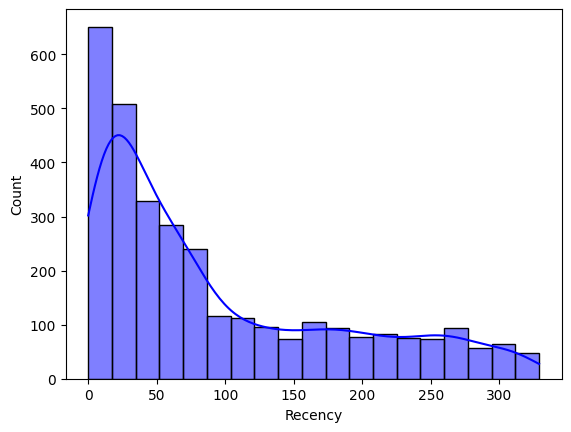

In [7]:
sns.histplot(data.Recency,kde=True,color="blue")

<Axes: xlabel='Frequency', ylabel='Count'>

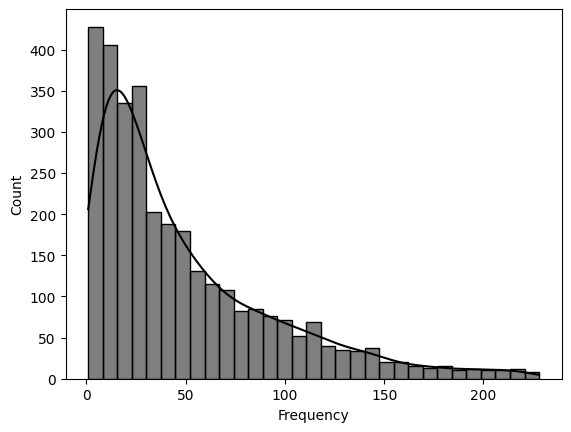

In [8]:
sns.histplot(data.Frequency,kde=True,color="black")

<Axes: xlabel='Monetary', ylabel='Count'>

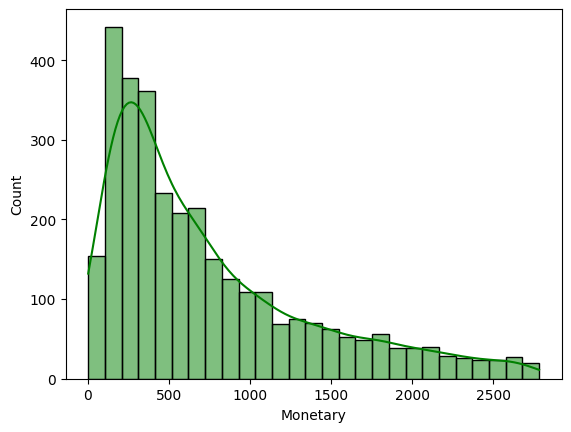

In [9]:
sns.histplot(data.Monetary,kde=True,color="green")

In [10]:
data["Recency"].replace(0,1,inplace=True)

In [11]:
data["Recency"].min()

1

Lambda value : 0.23921326158697623


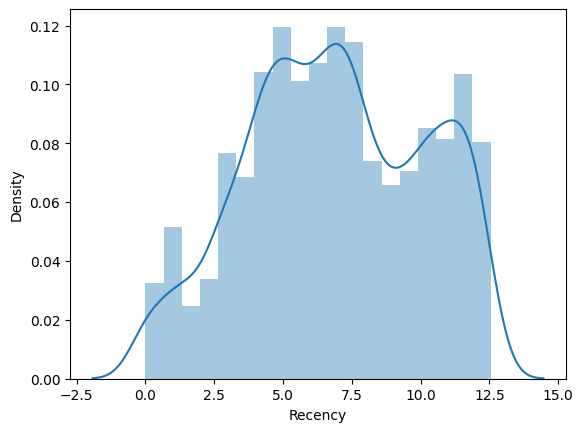

In [12]:
data["Recency"], lam_r = stats.boxcox(data["Recency"])
sns.distplot(data.Recency)
print("Lambda value :",lam_r)

Lambda value : 0.21730579181694484


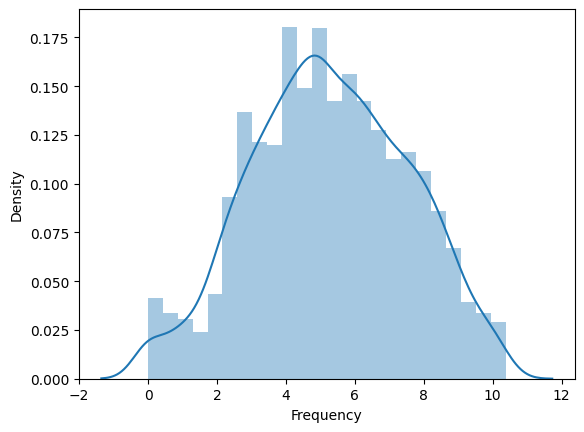

In [13]:
data["Frequency"], lam_f = stats.boxcox(data["Frequency"])
sns.distplot(data.Frequency)
print("Lambda value :",lam_f)

Lambda value : 0.1616365476662178


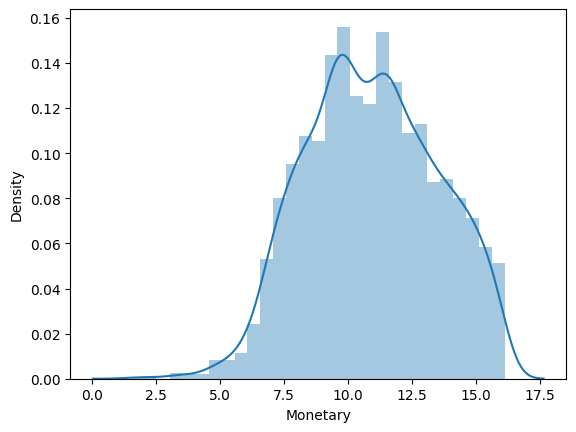

In [14]:
data["Monetary"], lam_m = stats.boxcox(data["Monetary"])
sns.distplot(data.Monetary)
print("Lambda value :",lam_m)

In [15]:
scl = StandardScaler()
c = ["Recency","Frequency","Monetary"]
data[c] = scl.fit_transform(data[c])

In [16]:
data.head()

,Recency,Frequency,Monetary
0,-1.913866,0.565076,0.631249
1,1.241106,-1.364817,-1.661527
2,0.144894,0.305520,0.640043
3,0.192992,-1.481350,1.412013
4,0.000871,-0.274070,-0.326043


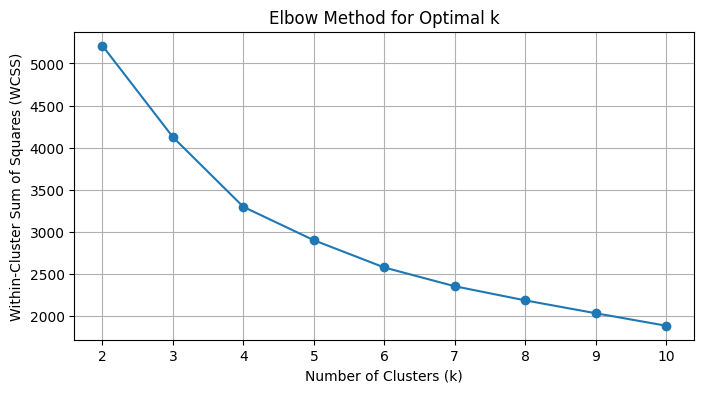

In [17]:
k_values = range(2, 11)
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [18]:
wcss

[5211.013364700228,
 4125.624453046764,
 3297.5029724453207,
 2901.244639272604,
 2577.42687130131,
 2354.6471887585294,
 2186.828413140486,
 2034.2287030958337,
 1885.7832424975516]

In [19]:
kmeans = KMeans(n_clusters=5,max_iter= 100)
kmeans.fit(data)

KMeans(max_iter=100, n_clusters=5)

In [20]:
# For assigning labels
prd = kmeans.predict(data)

In [21]:
retail["Cluster_ID"] = prd

In [22]:
retail.head()

,CustomerID,Recency,Frequency,Monetary,R-Score,F-Score,M-Score,RFMScore,LoyaltyLevel,Cluster_ID
0,12820,2,59,942,1,2,2,5,Platinum,2
1,12821,213,6,93,4,4,4,12,Bronze,0
2,12822,70,46,949,3,2,2,7,Gold,4
3,12823,74,5,1760,3,4,1,8,Silver,4
4,12824,59,25,397,3,3,3,9,Silver,3


<Axes: xlabel='Cluster_ID', ylabel='Recency'>

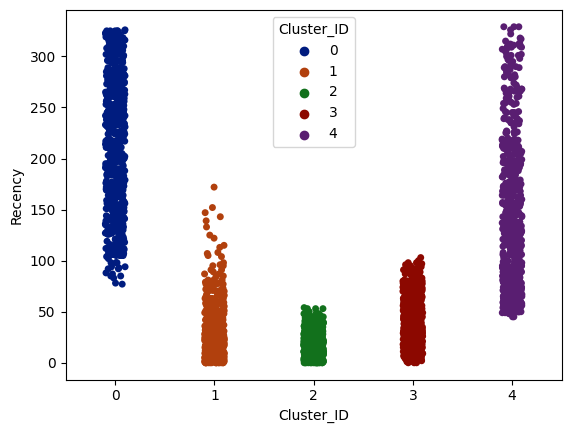

In [23]:
sns.stripplot(x="Cluster_ID",y="Recency",data=retail,hue="Cluster_ID", palette="dark")

<Axes: xlabel='Cluster_ID', ylabel='Frequency'>

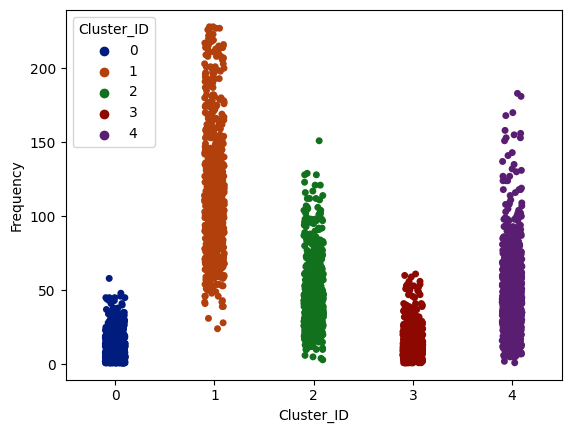

In [24]:
sns.stripplot(x="Cluster_ID",y="Frequency",data=retail,hue="Cluster_ID", palette="dark")

<Axes: xlabel='Cluster_ID', ylabel='Monetary'>

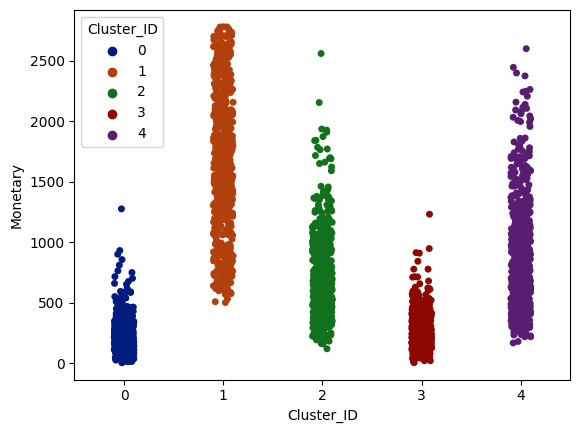

In [25]:
sns.stripplot(x="Cluster_ID",y="Monetary",data=retail,hue="Cluster_ID", palette="dark")

In [27]:
retail.groupby("Cluster_ID")["LoyaltyLevel"].value_counts()

Cluster_ID  LoyaltyLevel
0           Bronze          619
            Silver           29
1           Platinum        606
            Gold             11
2           Gold            304
            Platinum        247
            Silver           27
3           Silver          356
            Bronze          215
            Gold             45
4           Gold            322
            Silver          300
            Bronze           52
            Platinum         46
Name: LoyaltyLevel, dtype: int64

In [29]:
c0 = pd.DataFrame(retail[kmeans.labels_ == 0][["CustomerID","LoyaltyLevel"] + features])

In [34]:
c1 = pd.DataFrame(retail[kmeans.labels_ == 1][["CustomerID","LoyaltyLevel"] + features])

In [35]:
c2 = pd.DataFrame(retail[kmeans.labels_ == 2][["CustomerID","LoyaltyLevel"] + features])

In [36]:
c3 = pd.DataFrame(retail[kmeans.labels_ == 3][["CustomerID","LoyaltyLevel"] + features])

In [37]:
c4 = pd.DataFrame(retail[kmeans.labels_ == 4][["CustomerID","LoyaltyLevel"] + features])

In [46]:
c1.head()

,CustomerID,LoyaltyLevel,Recency,Frequency,Monetary
5,12826,Platinum,2,91,1475
12,12836,Platinum,58,175,2613
14,12838,Platinum,33,123,683
15,12840,Platinum,143,113,2727
17,12843,Platinum,65,103,1702


In [47]:
c1.describe()

,CustomerID,Recency,Frequency,Monetary
count,617.000000,617.00000,617.000000,617.000000
mean,15530.032415,28.67423,118.259319,1659.808752
std,1560.719761,26.29878,43.492806,585.344958
min,12826.000000,0.00000,24.000000,502.000000
25%,14226.000000,9.00000,86.000000,1224.000000
50%,15563.000000,22.00000,112.000000,1629.000000
75%,16898.000000,39.00000,143.000000,2101.000000
max,18287.000000,172.00000,228.000000,2781.000000


In [48]:
c1.describe(include="O")

,LoyaltyLevel
count,617
unique,2
top,Platinum
freq,606


In [49]:
c1["LoyaltyLevel"].value_counts()

Platinum    606
Gold         11
Name: LoyaltyLevel, dtype: int64

In [50]:
c1[c1['Monetary'] == 2781]

,CustomerID,LoyaltyLevel,Recency,Frequency,Monetary
2553,17213,Platinum,39,157,2781
